`pygsti` provides support for many different _plots_ you may want to make with your estimates.

In this tutorial, we go through the more commonly-used plots.

In [1]:
#Import the GST module -- you probably want this at the beginning of every notebook
import pygsti
import pygsti.report.plotting as pplt
import json
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Load up the data necessary to make the plots...

#Gate sets
gs_target = pygsti.io.load_gateset("tutorial_files/Example_Gateset.txt")
gs_mc2gst = pygsti.io.load_gateset("tutorial_files/Example_MC2GST_Gateset.txt")
gs_elgst = pygsti.io.load_gateset("tutorial_files/Example_eLGST_Gateset.txt")

#Data set
ds = pygsti.io.load_dataset("tutorial_files/Example_Dataset.txt", cache=False)

#Fiducials, germs, and maximum lengths (necessary to label the plots)
fiducialList = pygsti.io.load_gatestring_list("tutorial_files/Example_FiducialList.txt")
germList = pygsti.io.load_gatestring_list("tutorial_files/Example_GermsList.txt")
maxLengthList = json.load(open("tutorial_files/Example_maxLengths.json","r"))
specs = pygsti.construction.build_spam_specs(fiducialGateStrings=fiducialList)
strs = pygsti.construction.get_spam_strs(specs)

print "Gates (%d): " % len(gs_target.gates), gs_target.gates.keys()
print "Fiducials (%d): " % len(fiducialList), map(str,fiducialList)
print "Germs (%d): " % len(germList),map(str,germList)
print "Dataset has %d gate strings" % len(ds)

Loading tutorial_files/Example_Dataset.txt: 100%
Gates (3):  ['Gi', 'Gx', 'Gy']
Fiducials (6):  ['{}', 'Gx', 'Gy', 'GxGx', 'GxGxGx', 'GyGyGy']
Germs (11):  ['Gx', 'Gy', 'Gi', 'GxGy', 'GxGyGi', 'GxGiGy', 'GxGiGi', 'GyGiGi', 'GxGxGiGy', 'GxGyGyGi', 'GxGxGyGxGyGy']
Dataset has 2737 gate strings


In [3]:
## Create a gateset with target gates but SPAM ops given by contracted LGST 
#specs = pygsti.construction.build_spam_specs(fiducialGateStrings=fiducialList)
#gs_lgst = pygsti.do_lgst(ds, specs, targetGateset=gs_target, svdTruncateTo=4, verbosity=0)
#gs_after_gauge_opt = pygsti.optimize_gauge(gs_lgst, "target", targetGateset=gs_target)
#gs_clgst = pygsti.contract(gs_after_gauge_opt, "CPTP")
#
#gs_targetspam = gs_target.copy()
#gs_targetspam.preps = [v.copy() for v in gs_clgst.preps]
#gs_targetspam.effects = [v.copy() for v in gs_clgst.effects]
#gs_targetspam.make_spams()

#print "TargetSpam: ", pygsti.chi2( ds, gs_targetspam)
#print "Constrained LGST: ", pygsti.chi2( ds, gs_clgst )

In [4]:
## Debug: Check Chi2 gradient and hessian (takes a long time); no output is GOOD
#chi2_elgst, dchi2_elgst, d2chi2_elgst = pygsti.chi2( ds, gs_elgst, returnDeriv=True,
#                                                             returnHessian=True, check=True )
#chi2_lsgst, dchi2_lsgst, d2chi2_lsgst = pygsti.chi2( ds, gs_mc2gst, returnDeriv=True,
#                                                             returnHessian=True, check=True )

In [5]:
print "eLGST: ", pygsti.chi2( ds, gs_elgst)
print "MC2GST: ", pygsti.chi2( ds, gs_mc2gst)

eLGST:  12017.1124926
MC2GST:  2799.71352197


In [6]:
#Collect data we need for making plots
Xs = maxLengthList[1:]; xlbl = r"$L$ (max length)"
Ys = germList; ylbl = "Germ"
gateStrDict = { (x,y):pygsti.construction.repeat_with_max_length(y,x,False) for x in Xs for y in Ys }

#remove duplicates by replacing duplicate strings with None
runningList = []
for x in Xs:
    for y in Ys:
        if gateStrDict[(x,y)] in runningList:
            gateStrDict[(x,y)] = None
        else: runningList.append( gateStrDict[(x,y)] )

In [7]:
#Note on internals of plotting: lower left is origin in (rho-vec,E-vec index space) of sub-matrices
#M = diag(range(10))
#fig,axes = subplots()
#axes.pcolormesh(M)
#print M


## $\chi^2$ Plots

One of the most straightforward ways to evaluate GST estimates is to ask whether the estimates correctly reproduce the observed frequencies of the counts (or "clicks") for the experiments. The answer to this question is to compute the $\chi^{2}$ function for the gateset.

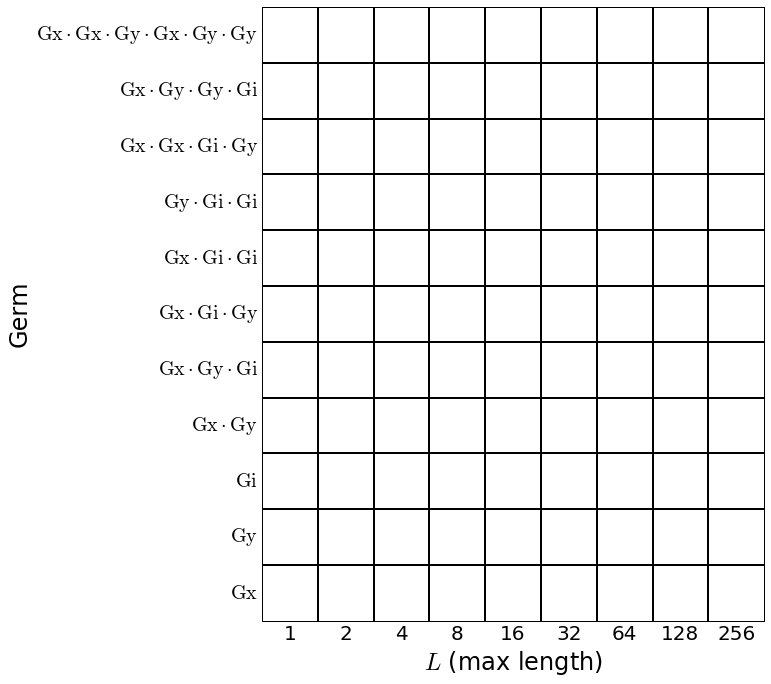

In [8]:
#Demonstrates a blank chi2 boxplot
pplt.blank_boxplot( Xs, Ys, gateStrDict, strs, xlbl, ylbl, sumUp=True, ticSize=20)

/home/enielse/research/pyGSTi/packages/pygsti/report/plotting.py:357: RuntimeWarning: invalid value encountered in greater
  return_value = _np.where(_np.greater(norm_trans, lin_norm_value),
/usr/lib64/python2.7/site-packages/numpy/ma/core.py:790: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)
/usr/lib64/python2.7/site-packages/numpy/ma/core.py:802: RuntimeWarning: invalid value encountered in less_equal
  return umath.less_equal(x, self.critical_value)


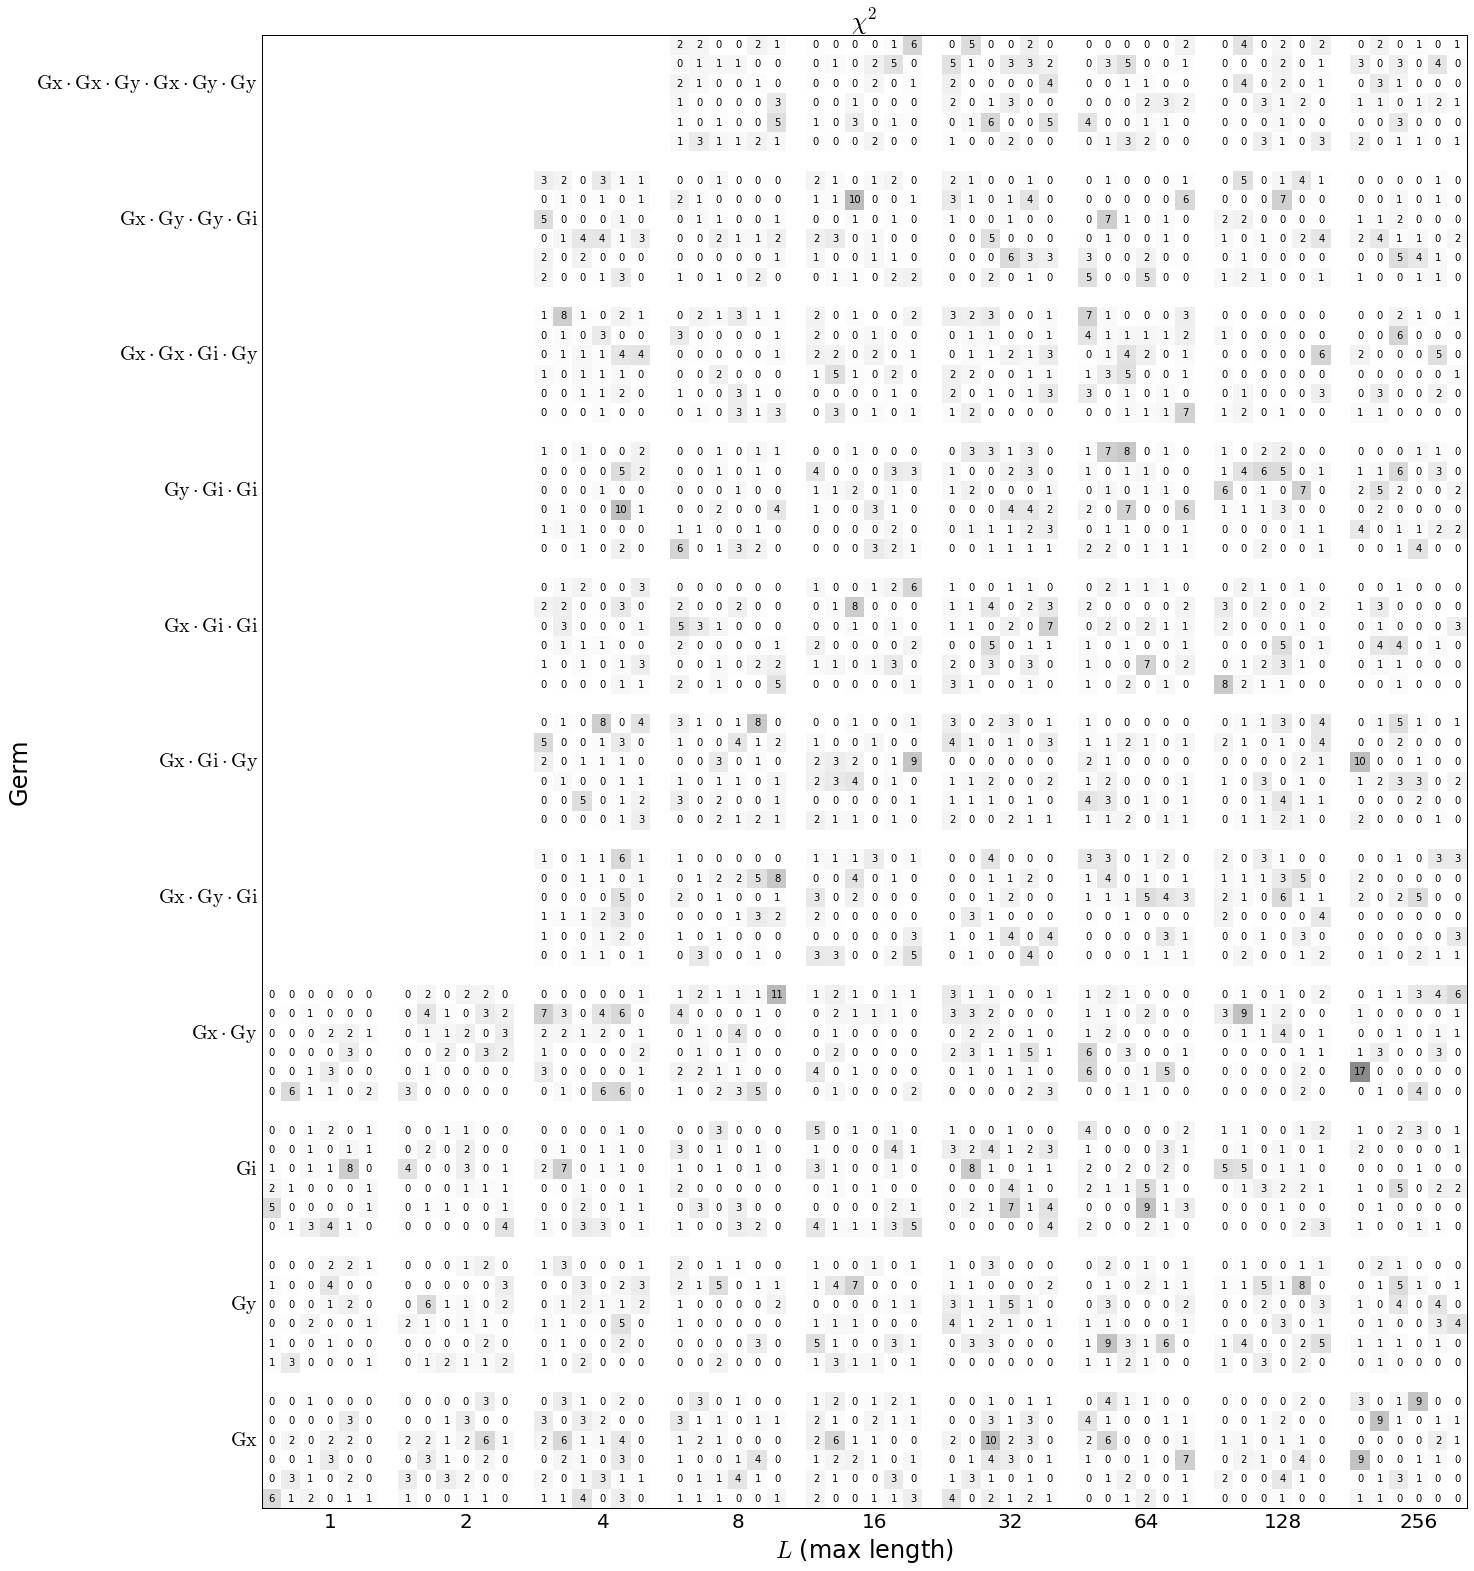

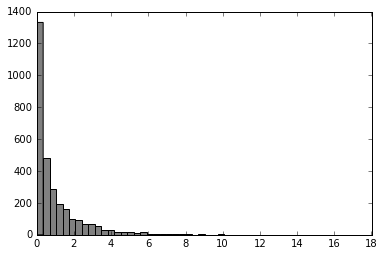

In [9]:
#Compute the chi2 scores for the estimated gateset using the MC2GST algorithm
pplt.chi2_boxplot( Xs, Ys, gateStrDict, ds, gs_mc2gst, strs, xlbl, ylbl,
                   scale=1.0, sumUp=False, histogram=True)

Because most of the $\chi^{2}$ values are close to 0, we conclude this estimated gateset does a good job of reproducing the observed frequencies. Which it should, since the figure of merit we were using in our estimation was the $\chi^{2}$ function!

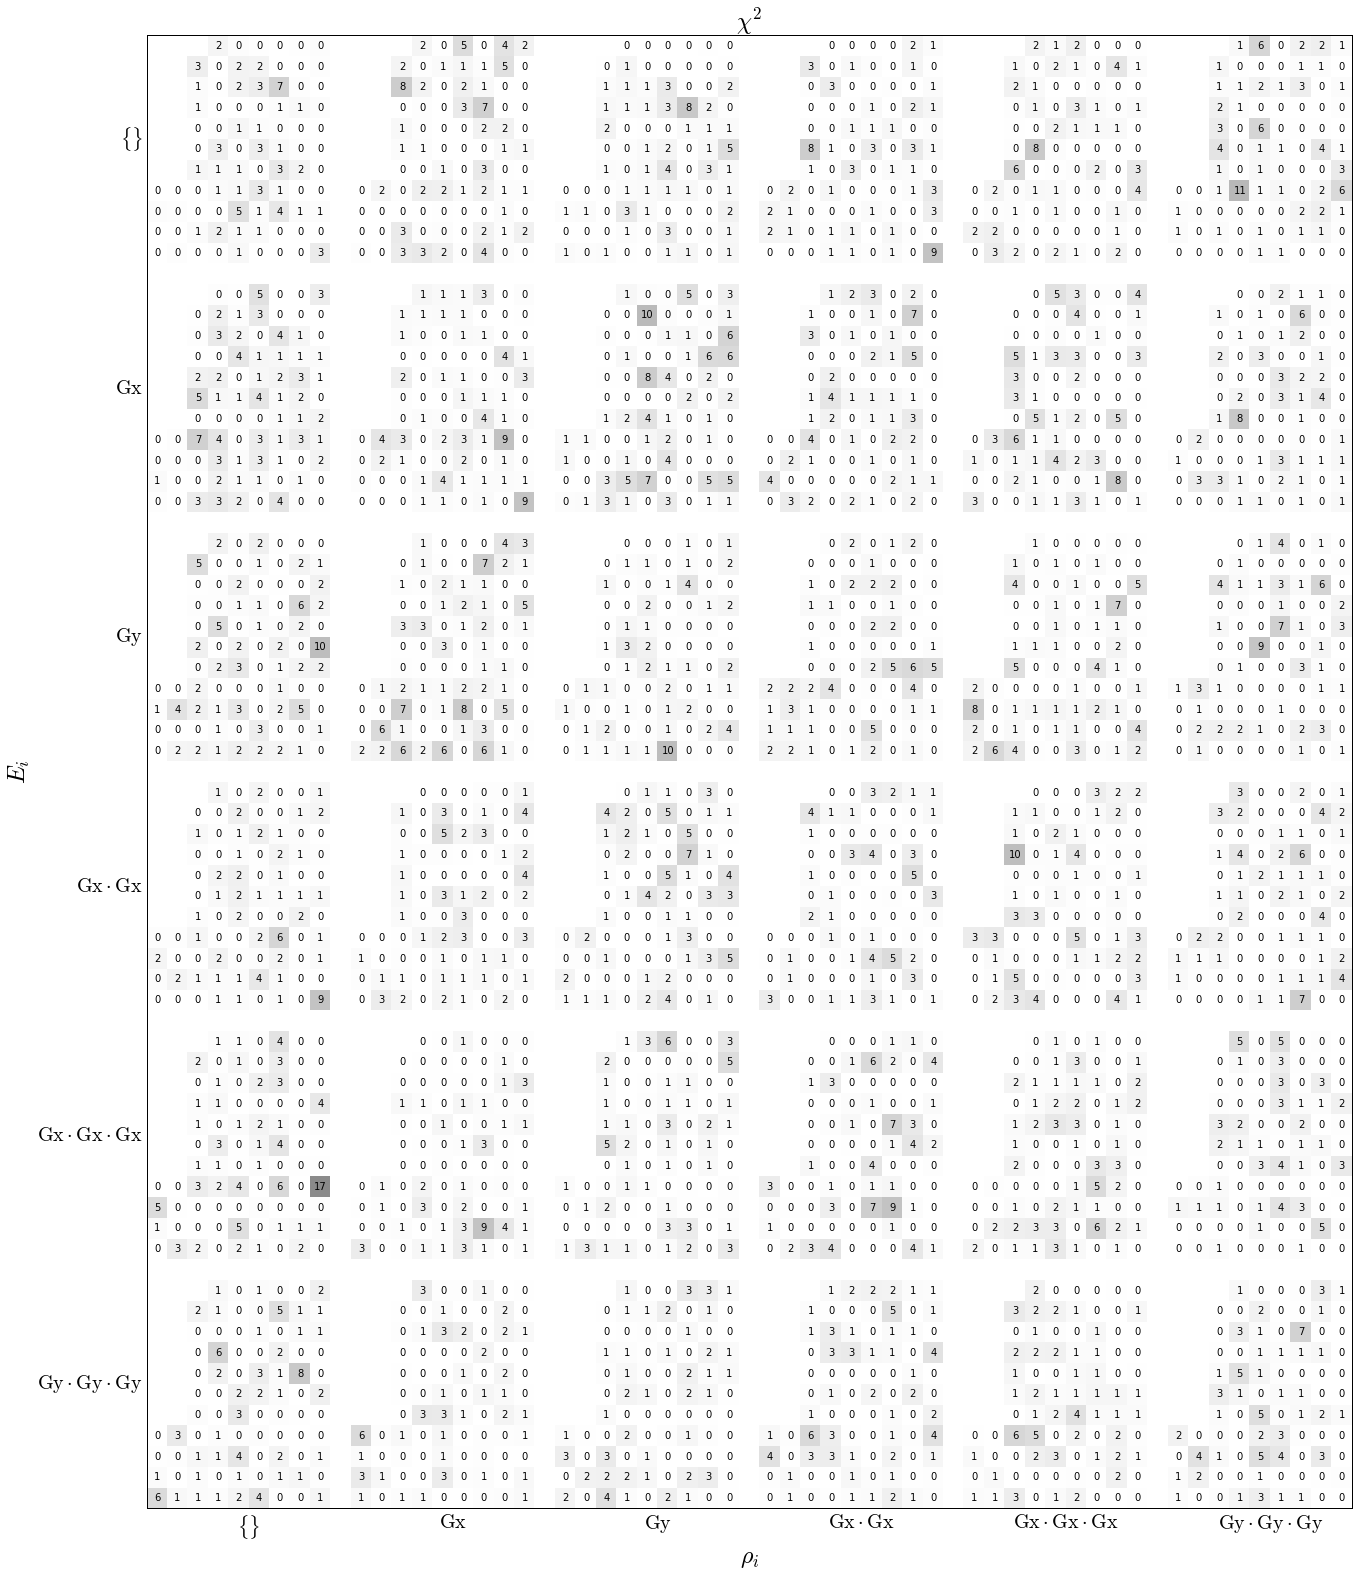

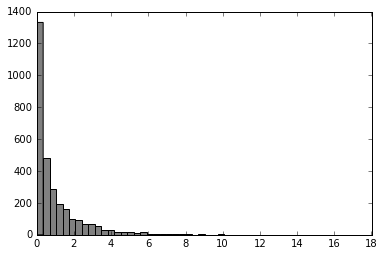

In [10]:
#Make another chi2 plot, with different x and y labels
pplt.chi2_boxplot( Xs, Ys, gateStrDict, ds, gs_mc2gst, strs, xlbl, ylbl,
               scale=1.0, sumUp=False, histogram=True, invert=True)

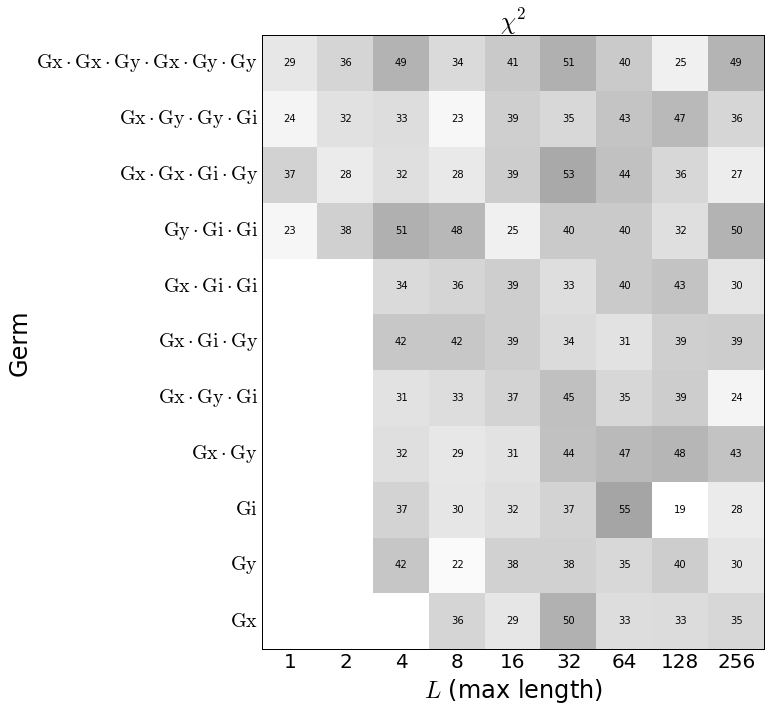

In [11]:
#Sum up the chi2 boxes for each (Germ, L) pair
pplt.chi2_boxplot( Xs, Ys, gateStrDict, ds, gs_mc2gst, strs, xlbl, ylbl,
                scale=1.0, sumUp=True)

## Direct $\chi^2$ Plots

In [12]:
directLGST = pplt.direct_lgst_gatesets( [gs for gs in gateStrDict.values() if gs is not None],
                                ds, specs, gs_target, svdTruncateTo=4, verbosity=2)
directLSGST = pplt.direct_mc2gst_gatesets( [gs for gs in gateStrDict.values() if gs is not None],
                                ds, specs, gs_target, svdTruncateTo=4, minProbClipForWeighting=1e-2, 
                                probClipInterval=(-1e6,1e6), verbosity=2)

#focusedGS = AT.focused_mc2gst_gatesets( [gs for gs in gateStrDict.values() if gs is not None],
#                                ds, specs, gs_mc2gst, minProbClipForWeighting=1e-2, 
#                                probClipInterval=(-1e6,1e6), verbosity=2)

--- Direct LGST precomputation ---
--- Computing gateset for string 0 of 84 ---
--- LGST ---
--- Computing gateset for string 1 of 84 ---
--- LGST ---
--- Computing gateset for string 2 of 84 ---
--- LGST ---
--- Computing gateset for string 3 of 84 ---
--- LGST ---
--- Computing gateset for string 4 of 84 ---
--- LGST ---
--- Computing gateset for string 5 of 84 ---
--- LGST ---
--- Computing gateset for string 6 of 84 ---
--- LGST ---
--- Computing gateset for string 7 of 84 ---
--- LGST ---
--- Computing gateset for string 8 of 84 ---
--- LGST ---
--- Computing gateset for string 9 of 84 ---
--- LGST ---
--- Computing gateset for string 10 of 84 ---
--- LGST ---
--- Computing gateset for string 11 of 84 ---
--- LGST ---
--- Computing gateset for string 12 of 84 ---
--- LGST ---
--- Computing gateset for string 13 of 84 ---
--- LGST ---
--- Computing gateset for string 14 of 84 ---
--- LGST ---
--- Computing gateset for string 15 of 84 ---
--- LGST ---
--- Computing gateset for strin

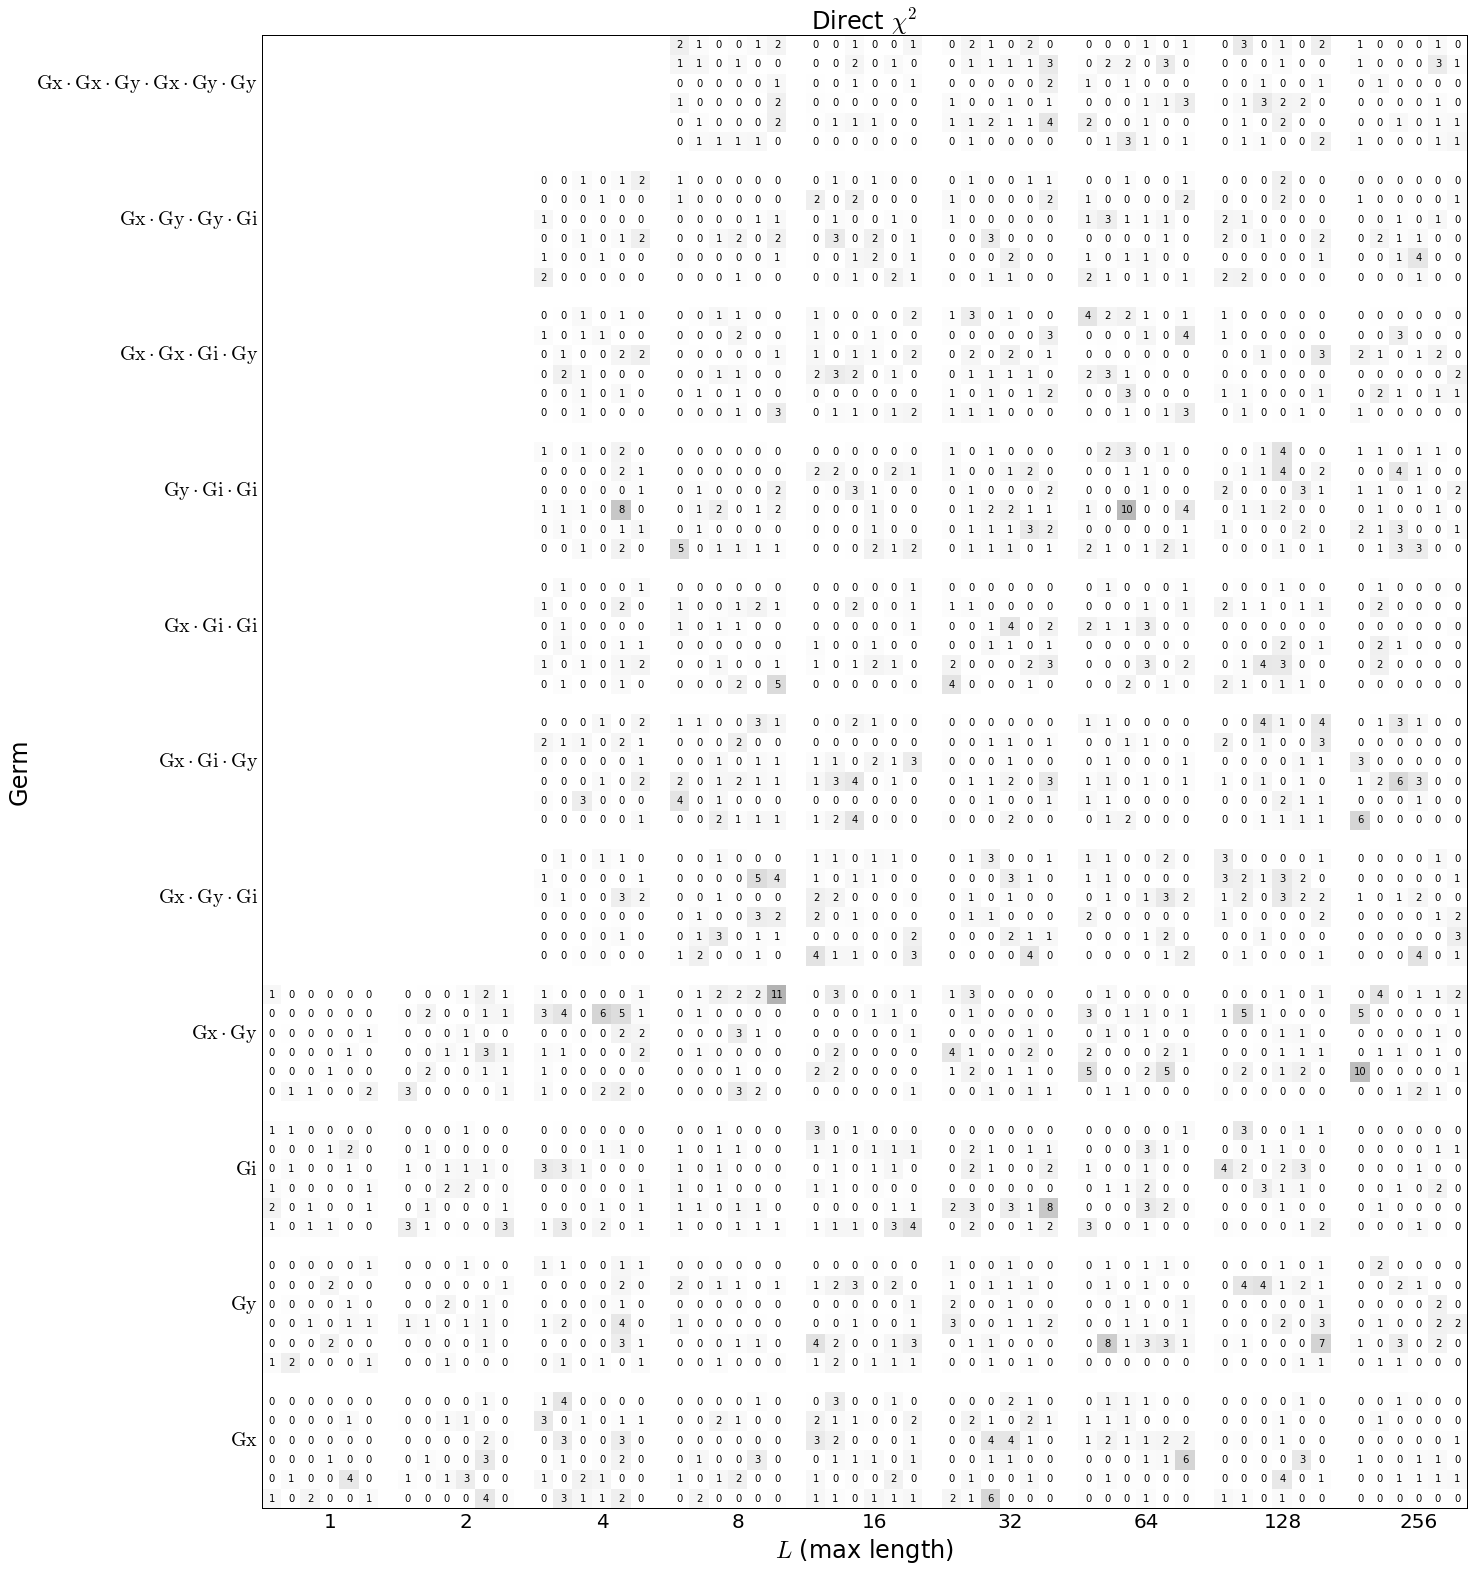

In [13]:
pplt.direct_chi2_boxplot( Xs, Ys, gateStrDict, ds, directLSGST, strs, xlbl, ylbl,
                          scale=1.0, boxLabels=True )

/home/enielse/research/pyGSTi/packages/pygsti/report/plotting.py:407: RuntimeWarning: invalid value encountered in greater
  resdat[resdat>0] /= abs(vmax - midpoint)
/home/enielse/research/pyGSTi/packages/pygsti/report/plotting.py:408: RuntimeWarning: invalid value encountered in less
  resdat[resdat<0] /= abs(vmin - midpoint)


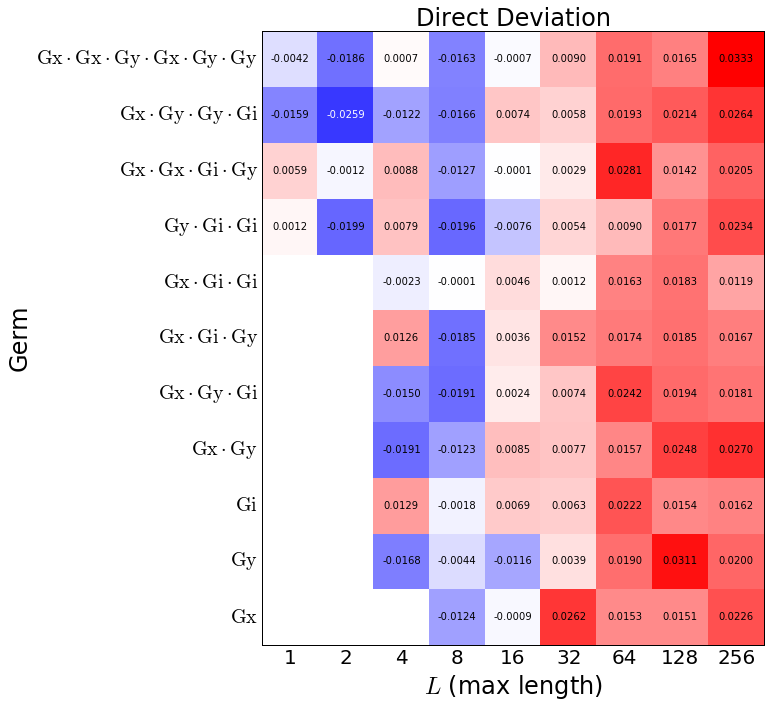

In [14]:
pplt.direct_deviation_boxplot(Xs, Ys, gateStrDict, ds, gs_mc2gst, directLSGST, xlbl, ylbl, prec=4,
                        scale=1.0, boxLabels=True)

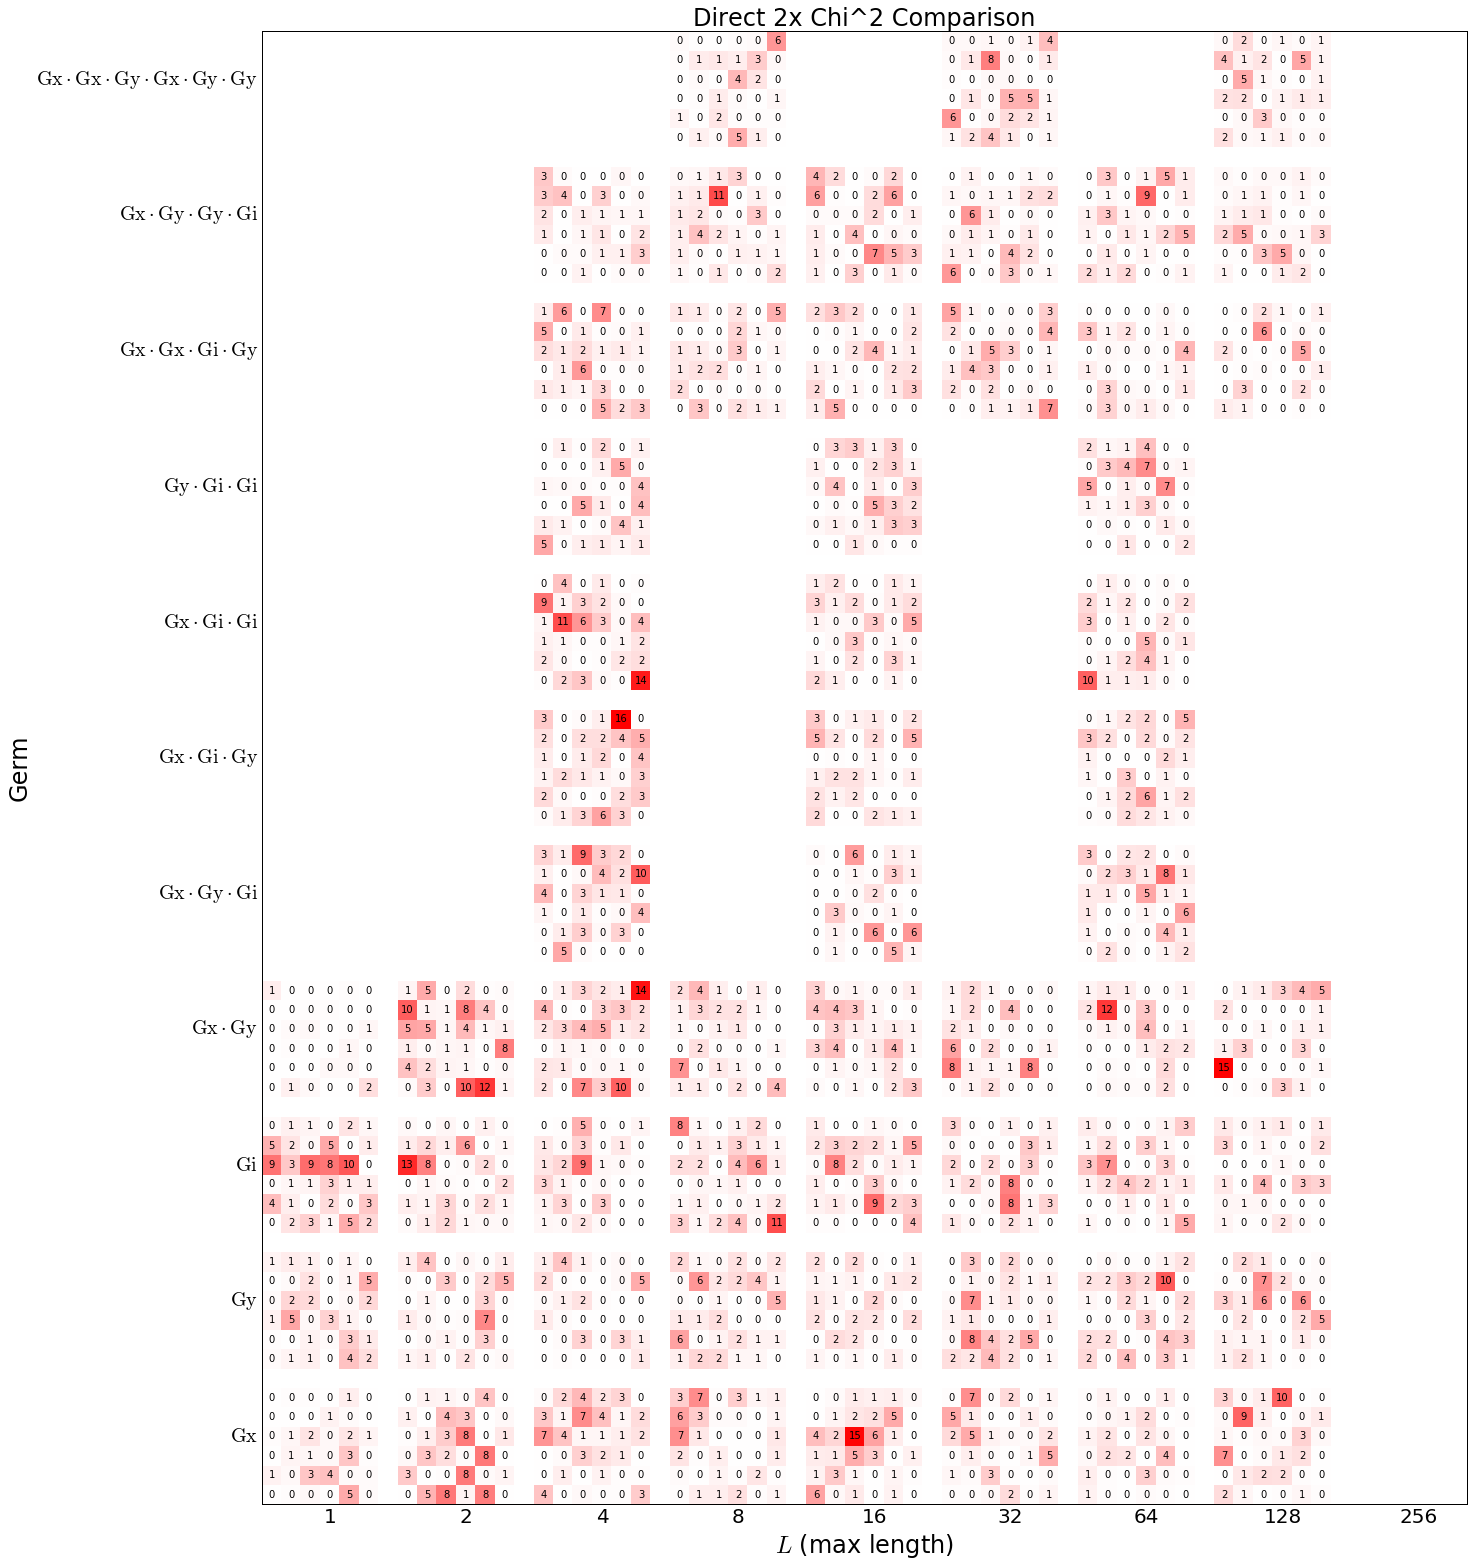

In [15]:
pplt.direct2x_comp_boxplot( Xs, Ys, gateStrDict, ds, directLSGST, strs, xlbl, ylbl,
                        scale=1.0, boxLabels=True )

## Error Rate Plots (uses Direct-X results)

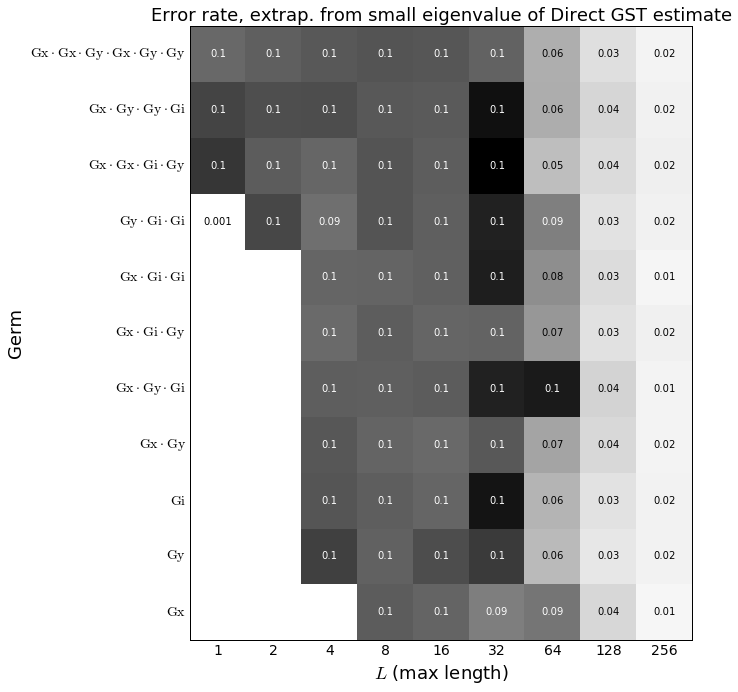

In [16]:
pplt.small_eigval_err_rate_boxplot(Xs, Ys, gateStrDict, ds, directLSGST, xlbl, ylbl,
                             scale=1.0, boxLabels=True)

## Whack-a-$\chi^2$-mole Plots

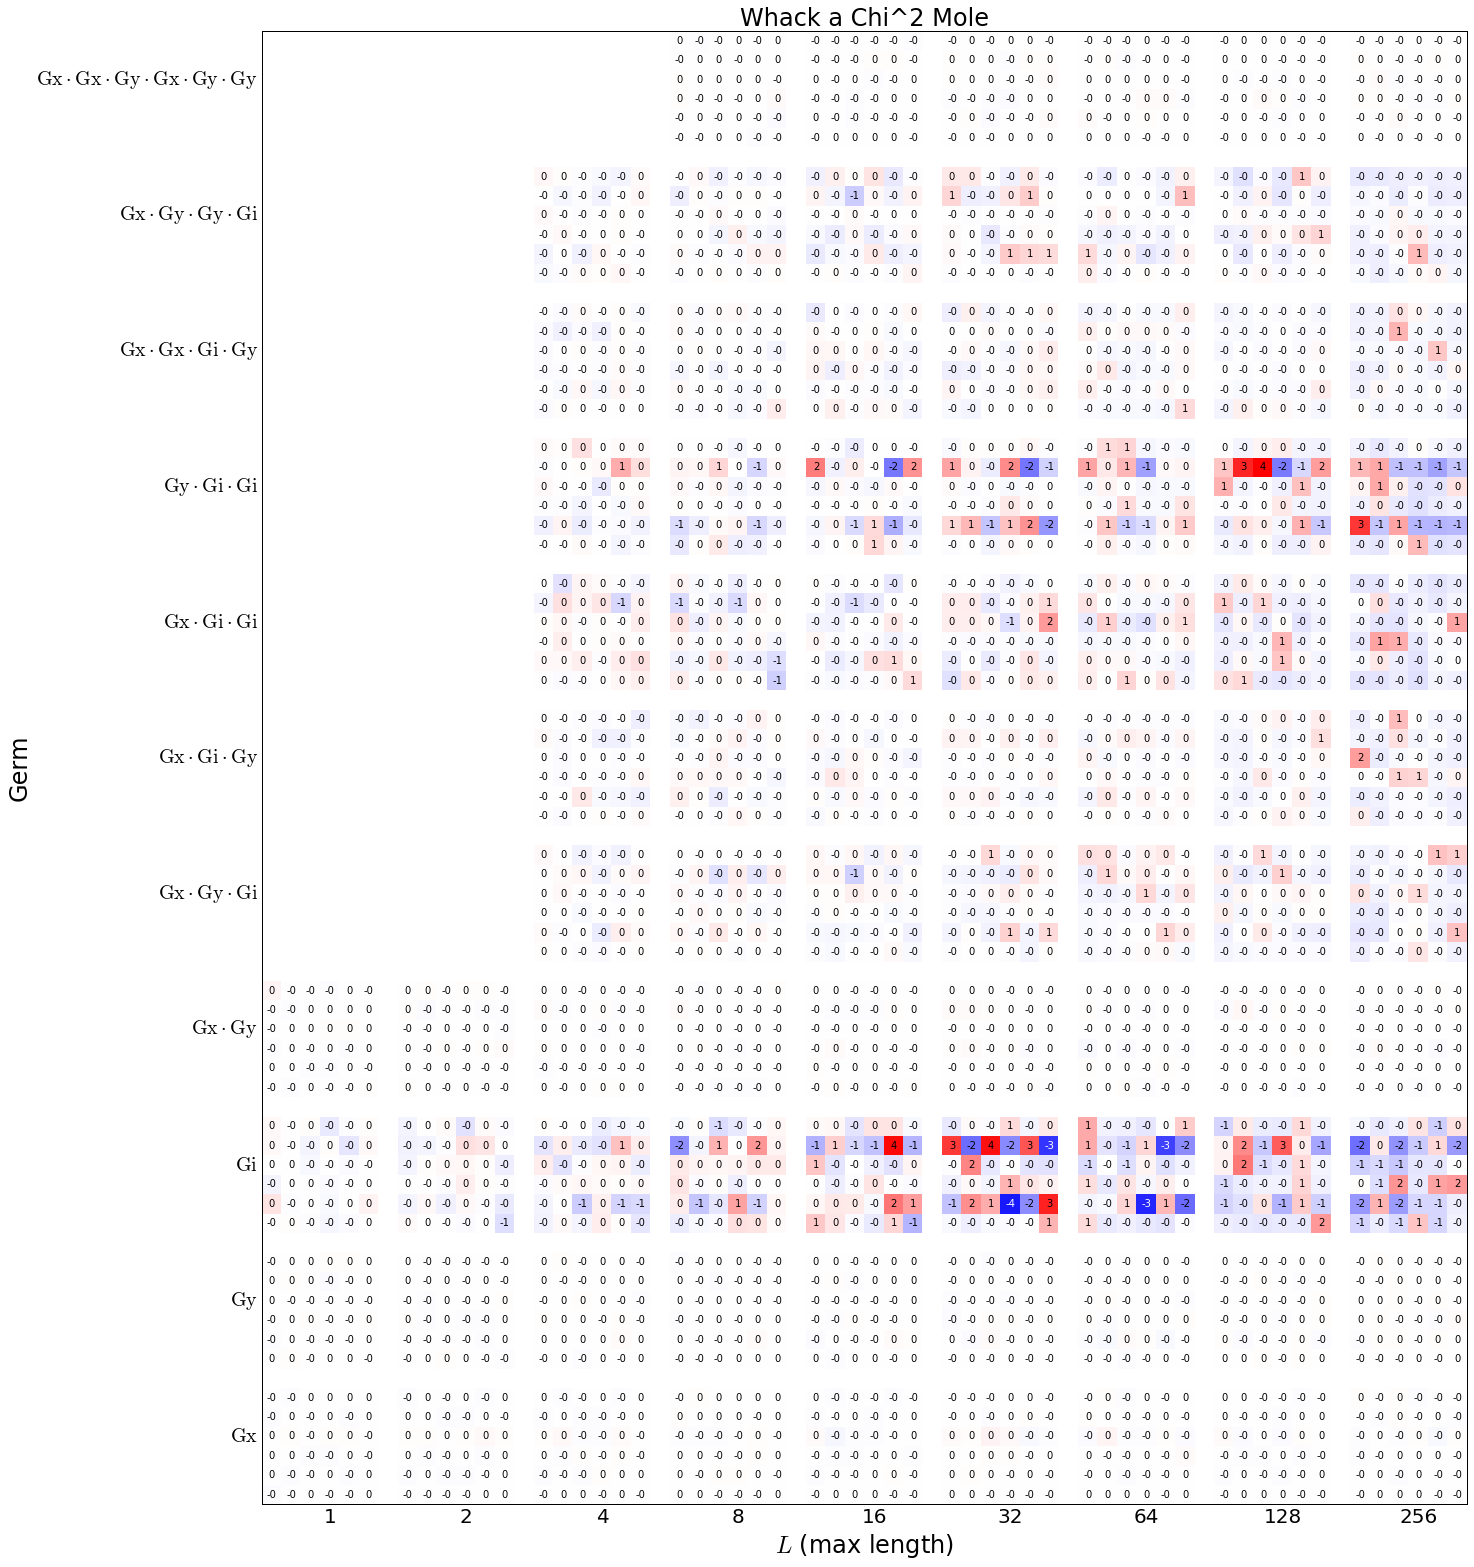

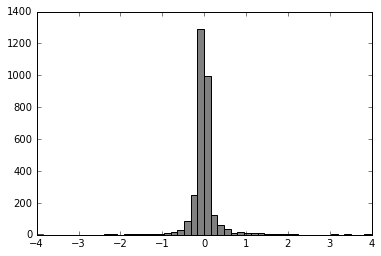

In [17]:
whack = pygsti.objects.GateString( ('Gi',)*256 )
fullGatestringList = pygsti.io.load_gatestring_list("tutorial_files/Example_LSGSTlist256.txt")
pplt.whack_a_chi2_mole_boxplot( whack, fullGatestringList, Xs, Ys, gateStrDict, ds, gs_mc2gst, strs, xlbl, ylbl,
               scale=1.0, sumUp=False, histogram=True )

##Other plots

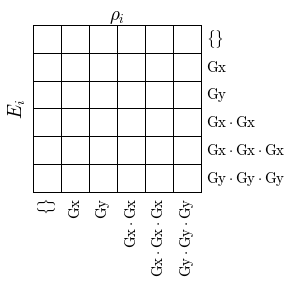

In [18]:
pplt.gof_boxplot_keyplot(strs)

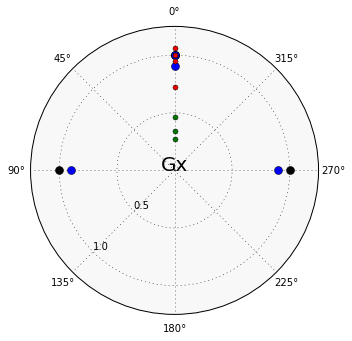

In [19]:
pplt.polar_eigenval_plot(gs_mc2gst['Gx'], gs_target['Gx'], size=(4,4), title="Gx")